In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

In [4]:
base = "/Users/nickichen/Desktop/urap data"

#loading datasets
cleaned_names = pd.read_csv(f"{base}/bunmd_clean_names_v1.csv.gz", compression="gzip")
geography = pd.read_csv(f"{base}/bunmd_geography_supplement_v1.csv")
sibs_exact = pd.read_csv(f"{base}/bunmd_siblings_v2/bunmd_sibs_exact_match_v2.csv")
sibs_flexible = pd.read_csv(f"{base}/bunmd_siblings_v2/bunmd_sibs_flexible_match_v2.csv")



In [5]:
database = pd.read_csv(f"{base}/bunmd_v2.csv")

/var/folders/ng/ffs689f95vx8r67ys3wq6zzr0000gn/T/ipykernel_53630/811814656.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  database = pd.read_csv(f"{base}/bunmd_v2.csv")


In [6]:
database.head()

,ssn,zip_residence,lname,mname,fname,byear,dyear,socstate,bmonth,dmonth,...,father_lname,mother_fname,mother_mname,mother_lname,age_first_application,death_age,weight,ccweight,bpl_string,socstate_string
0,1010104,033030000,BAKER,E,ELSIE,1909,1989,3300.0,10.0,12,...,NaN,NaN,NaN,NaN,NaN,80,1.064998,NaN,NaN,New Hampshire
1,1010304,NaN,THOMPSON,NaN,VICTOR,1915,1974,3300.0,9.0,6,...,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,New Hampshire
2,1010601,032530474,SMITH,O,EDWARD,1915,1993,3300.0,8.0,11,...,SMITH,VERA,E,BERRY,21.0,78,1.033511,1.245024,New Hampshire,New Hampshire
3,1010604,054037850,BUCKLIN,H,ZELA,1906,1998,3300.0,10.0,6,...,NaN,NaN,NaN,NaN,NaN,91,1.024712,NaN,NaN,New Hampshire
4,1010702,342380000,BELL,P,LEONORA,1901,1989,3300.0,6.0,2,...,NaN,NaN,NaN,NaN,NaN,87,1.015503,NaN,NaN,New Hampshire


In [7]:
cleaned_names.head(10)

,ssn,fname_clean,mname_clean,lname_clean,father_fname_clean,father_mname_clean,father_lname_clean,mother_fname_clean,mother_mname_clean,mother_lname_clean
0,1010011,leon,r,drew,NaN,NaN,NaN,NaN,NaN,NaN
1,1010017,william,NaN,michals,NaN,NaN,NaN,NaN,NaN,NaN
2,1010027,gladys,NaN,tebeau,frederick,j,veber,laura,j,lackey
3,1010028,robert,NaN,matott,NaN,NaN,NaN,NaN,NaN,NaN
4,1010029,lucinda,b,lumley,earl,r,morgain,cora,m,beaubien
5,1010032,madeleine,c,guertin,raymond,NaN,marchand,noella,NaN,bourget
6,1010034,bertha,n,heath,NaN,NaN,NaN,NaN,NaN,NaN
7,1010035,vinie,m,raymond,NaN,NaN,NaN,NaN,NaN,NaN
8,1010036,genevieve,t,fitts,george,NaN,rivet,anna,NaN,lavoie
9,1010037,gladys,c,fournier,weston,NaN,johnson,inez,NaN,boyne


In [8]:
geography.head(10)

,ssn,birth_gnis_code,birth_city,birth_county,birth_fips,birth_region,death_zip,death_city,death_county,death_fips,death_state,death_region,death_country,death_ruc1993
0,1010104,NaN,NaN,NaN,NaN,NaN,03303,concord,merrimack,33013.0,nh,northeast,US,4.0
1,1010601,868384.0,meredith bel,belknap,33001.0,northeast,03253,meredith,belknap,33001.0,nh,northeast,US,6.0
2,1010604,NaN,NaN,NaN,NaN,NaN,05403,burlington,chittenden,50007.0,vt,northeast,US,3.0
3,1010702,NaN,NaN,NaN,NaN,NaN,34238,sarasota,sarasota,12115.0,fl,south,US,2.0
4,1010804,866143.0,chesterfield,cheshire,33005.0,northeast,03446,keene,cheshire,33005.0,nh,northeast,US,4.0
5,1010901,865269.0,ashland,grafton,33009.0,northeast,03217,ashland,grafton,33009.0,nh,northeast,US,5.0
6,1010903,865269.0,ashland graf,grafton,33009.0,northeast,01915,beverly,essex,25009.0,ma,northeast,US,0.0
7,1011101,870935.0,winchester c,cheshire,33005.0,northeast,03470,winchester,cheshire,33005.0,nh,northeast,US,4.0
8,1011103,NaN,NaN,NaN,NaN,NaN,03470,winchester,cheshire,33005.0,nh,northeast,US,4.0
9,1011201,209356.0,n grosvenord,windham,9015.0,northeast,05101,bellows falls,windham,50025.0,vt,northeast,US,7.0


In [9]:
sibs_exact.head(10)

,ssn,sib_group_id_exact
0,1010038,1203849
1,1010047,1010122
2,1010077,32055083
3,1010122,1010122
4,1010178,1010185
5,1010185,1010185
6,1010193,19408381
7,1010333,3095737
8,1010386,1013569
9,1010438,9305276


In [ ]:
sibs_flexible.head(10)

#can see sibling variation --> more persuasive --> stronger evidence since siblings have more similarities
#education between siblings, higher ed = longer life? --> higher abilitiy/more efficitivea at accomplishing goals, --> indirectly parents have more resources
#

,ssn,sib_group_id_flexible
0,1010032,3033462
1,1010047,1010122
2,1010077,32055083
3,1010122,1010122
4,1010178,1010185
5,1010185,1010185
6,1010193,19408381
7,1010333,3095737
8,1010386,1013569
9,1010438,9305276


In [19]:
# Number of unique IDs
print("Unique people:", cleaned_names['ssn'].nunique())
print("Unique sibling groups (exact):", sibs_exact['sib_group_id_exact'].nunique())
print("Unique sibling groups (flexible):", sibs_flexible['sib_group_id_flexible'].nunique())

# Missing values overview
cleaned_names.isna().mean().sort_values(ascending=False).head(10)
geography.isna().mean().sort_values(ascending=False).head(10)

Unique people: 49337827
Unique sibling groups (exact): 2130398
Unique sibling groups (flexible): 2745707


birth_county       0.305673
birth_fips         0.305673
birth_gnis_code    0.305590
birth_city         0.305590
birth_region       0.263828
death_ruc1993      0.184529
death_fips         0.184529
death_region       0.184358
death_county       0.177776
death_state        0.177776
dtype: float64

In [11]:
sib_group_sizes = sibs_exact.groupby('sib_group_id_exact')['ssn'].nunique().reset_index()
sib_group_sizes.columns = ['sib_group_id_exact', 'group_size']
sib_group_sizes.head()

,sib_group_id_exact,group_size
0,1010122,2
1,1010185,2
2,1012253,2
3,1013498,2
4,1013569,2


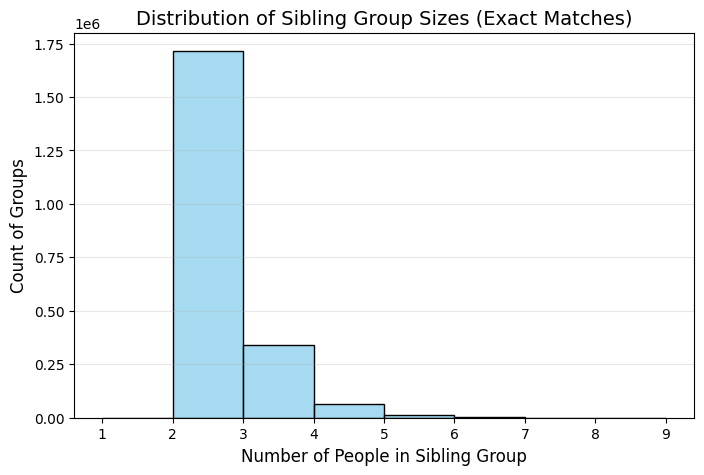

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(
    data=sib_group_sizes,
    x='group_size',
    bins=range(1, sib_group_sizes['group_size'].max() + 1),
    color='skyblue',
    edgecolor='black'
)

plt.title("Distribution of Sibling Group Sizes (Exact Matches)", fontsize=14)
plt.xlabel("Number of People in Sibling Group", fontsize=12)
plt.ylabel("Count of Groups", fontsize=12)
plt.xticks(range(1, min(sib_group_sizes['group_size'].max(), 10) + 1))
plt.grid(axis='y', alpha=0.3)
plt.show()



Mean exact family size: 2.237700654994982
Max exact family size: 9


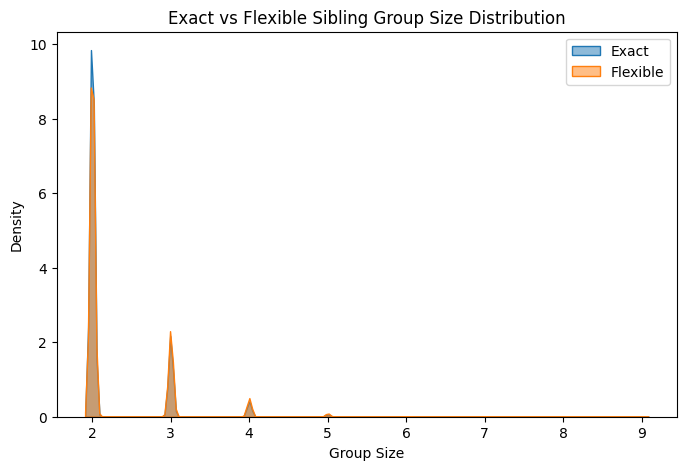

In [ ]:
#average family size
print("Mean exact family size:", sib_group_sizes['group_size'].mean())
print("Max exact family size:", sib_group_sizes['group_size'].max())

#compare flexible vs exact family size distributions
sib_flex_sizes = sibs_flexible.groupby('sib_group_id_flexible')['ssn'].nunique().reset_index(name='group_size')
plt.figure(figsize=(8,5))
sns.kdeplot(sib_group_sizes['group_size'], label='Exact', fill=True, alpha=0.5)
sns.kdeplot(sib_flex_sizes['group_size'], label='Flexible', fill=True, alpha=0.5)
plt.legend()
plt.title("Exact vs Flexible Sibling Group Size Distribution")
plt.xlabel("Group Size")
plt.show()

In [ ]:
#completeness of parent names
cols = ['father_fname_clean', 'mother_fname_clean']
cleaned_names[cols].notna().mean()

father_fname_clean    0.71401
mother_fname_clean    0.71702
dtype: float64

/var/folders/ng/ffs689f95vx8r67ys3wq6zzr0000gn/T/ipykernel_35475/3905766017.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=geo_merged, x='birth_region', y='group_size', palette='pastel')


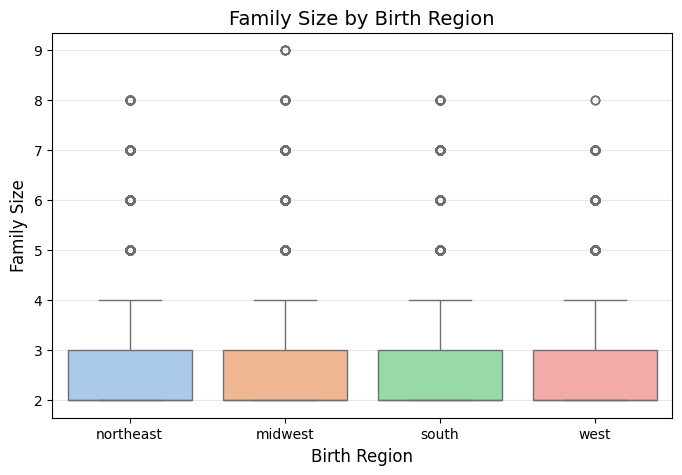

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#merge sibling data w/ geography and group sizes
geo_merged = (
    sibs_exact
    .merge(geography[['ssn', 'birth_region']], on='ssn', how='left')
    .merge(sib_group_sizes, on='sib_group_id_exact', how='left')
)

#drop missing values
geo_merged = geo_merged.dropna(subset=['birth_region', 'group_size'])

#keep string clean w/o white spaces
geo_merged['birth_region'] = geo_merged['birth_region'].astype(str).str.strip().str.lower()

plt.figure(figsize=(8,5))
sns.boxplot(data=geo_merged, x='birth_region', y='group_size', palette='pastel')
plt.title("Family Size by Birth Region", fontsize=14)
plt.xlabel("Birth Region", fontsize=12)
plt.ylabel("Family Size", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [26]:
#filering to NC

geo_nc = geography[geography['birth_fips'].astype(str).str.startswith('37', na=False)].copy()
print(f"North Carolina records: {len(geo_nc):,}")

nc_data = (
    geo_nc
    .merge(cleaned_names, on='ssn', how='left')
    .merge(sibs_exact, on='ssn', how='left')
    .merge(sib_group_sizes, on='sib_group_id_exact', how='left')
)
print(nc_data.shape)

nc_data.info()
nc_data.describe(include='all')
nc_data.isna().mean().sort_values(ascending=False).head(10)


North Carolina records: 981,972
(981972, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981972 entries, 0 to 981971
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ssn                 981972 non-null  int64  
 1   birth_gnis_code     981972 non-null  float64
 2   birth_city          981972 non-null  object 
 3   birth_county        981972 non-null  object 
 4   birth_fips          981972 non-null  float64
 5   birth_region        981972 non-null  object 
 6   death_zip           769491 non-null  object 
 7   death_city          765024 non-null  object 
 8   death_county        765173 non-null  object 
 9   death_fips          765148 non-null  float64
 10  death_state         765173 non-null  object 
 11  death_region        765163 non-null  object 
 12  death_country       765214 non-null  object 
 13  death_ruc1993       765148 non-null  float64
 14  fname_clean         981882 non-null  ob

group_size            0.850509
sib_group_id_exact    0.850509
mother_mname_clean    0.405652
father_mname_clean    0.309689
mname_clean           0.238581
death_city            0.220931
death_ruc1993         0.220805
death_fips            0.220805
death_region          0.220789
death_county          0.220779
dtype: float64

In [ ]:
#names
# look at a few yearbook files and by hand see if i can find people in the data --> yearbook and find the ppl up (regex)--> nicknames? agree?
# age? right last name diff first name? 

In [ ]:
# combining cleaned_names, geography, sibs_exact
combined = (
    cleaned_names
    .merge(geography, on='ssn', how='left') 
    .merge(sibs_exact, on='ssn', how='left') 
)

print("✅ Combined dataset created!")
print(f"Shape: {combined.shape[0]:,} rows × {combined.shape[1]} columns")

combined.head(10)


✅ Combined dataset created!
Shape: 49,337,827 rows × 24 columns


,ssn,fname_clean,mname_clean,lname_clean,father_fname_clean,father_mname_clean,father_lname_clean,mother_fname_clean,mother_mname_clean,mother_lname_clean,...,birth_region,death_zip,death_city,death_county,death_fips,death_state,death_region,death_country,death_ruc1993,sib_group_id_exact
0,1010011,leon,r,drew,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,80864,yoder,el paso,8041.0,co,west,US,2.0,NaN
1,1010017,william,NaN,michals,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010027,gladys,NaN,tebeau,frederick,j,veber,laura,j,lackey,...,northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1010028,robert,NaN,matott,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010029,lucinda,b,lumley,earl,r,morgain,cora,m,beaubien,...,northeast,03894,wolfeboro,carroll,33003.0,nh,northeast,US,6.0,NaN
5,1010032,madeleine,c,guertin,raymond,NaN,marchand,noella,NaN,bourget,...,NaN,03301,concord,merrimack,33013.0,nh,northeast,US,4.0,NaN
6,1010034,bertha,n,heath,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,03301,concord,merrimack,33013.0,nh,northeast,US,4.0,NaN
7,1010035,vinie,m,raymond,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,03301,concord,merrimack,33013.0,nh,northeast,US,4.0,NaN
8,1010036,genevieve,t,fitts,george,NaN,rivet,anna,NaN,lavoie,...,northeast,03301,concord,merrimack,33013.0,nh,northeast,US,4.0,NaN
9,1010037,gladys,c,fournier,weston,NaN,johnson,inez,NaN,boyne,...,northeast,03303,concord,merrimack,33013.0,nh,northeast,US,4.0,NaN


In [ ]:
# first 4 students in ayantee1939negr (page 22)
targets = [
    ("james", "pendergrast"),
    ("carl", "johnson"),
    ("james", "brown"),
    ("willa", "johnson")
]

matches = pd.DataFrame()

for first, last in targets:
    # find rows where BOTH first and last name match (case-insensitive)
    mask = (
        cleaned_names["fname_clean"].str.fullmatch(first, case=False, na=False) &
        cleaned_names["lname_clean"].str.fullmatch(last, case=False, na=False)
    )

    found = cleaned_names[mask].copy()
    found["search_name"] = f"{first.title()} {last.title()}"
    matches = pd.concat([matches, found], ignore_index=True)

print(f"✅ Found {len(matches):,} total matching rows across all targets.")
display(matches[["ssn", "fname_clean", "lname_clean", "search_name"]].head(10))


✅ Found 7,863 total matching rows across all targets.


,ssn,fname_clean,lname_clean,search_name
0,241124379,james,pendergrast,James Pendergrast
1,244600904,james,pendergrast,James Pendergrast
2,409503917,james,pendergrast,James Pendergrast
3,410281091,james,pendergrast,James Pendergrast
4,410641808,james,pendergrast,James Pendergrast
5,414569177,james,pendergrast,James Pendergrast
6,425600751,james,pendergrast,James Pendergrast
7,530520109,james,pendergrast,James Pendergrast
8,552484573,james,pendergrast,James Pendergrast
9,16102841,carl,johnson,Carl Johnson


In [43]:
import pandas as pd

# --- Step 1: standardize column names ---
matches.columns = matches.columns.str.lower()
cleaned_names.columns = cleaned_names.columns.str.lower()
geography.columns = geography.columns.str.lower()

# --- Step 2: merge matches with names ---
merged = matches.merge(
    cleaned_names[['ssn', 'fname_clean', 'mname_clean', 'lname_clean']],
    on='ssn', how='left'
)

# --- Step 3: merge with geography data ---
merged = merged.merge(
    geography[['ssn', 'birth_city', 'birth_county', 'birth_fips',
               'death_zip', 'death_city', 'death_county',
               'death_fips', 'death_state']],
    on='ssn', how='left'
)

# --- Step 4: convert to string for matching ---
for col in ['birth_fips', 'death_zip', 'death_fips', 'death_state']:
    merged[col] = merged[col].astype(str)

# --- Step 5: identify North Carolina-born or -died people ---
born_nc = merged['birth_fips'].str.startswith('37', na=False)
died_nc = (
    merged['death_zip'].str.startswith(('27', '28', '29'), na=False)
    | merged['death_fips'].str.startswith('37', na=False)
    | (merged['death_state'].str.lower() == 'nc')
)

# --- Step 6: filter ---
merged_nc = merged[born_nc | died_nc].copy()

print(f"✅ Found {len(merged_nc):,} people linked to North Carolina.")
display(
    merged_nc[['ssn', 'fname_clean_y', 'mname_clean_y', 'lname_clean_y',
                'birth_city', 'birth_county',
                'death_city', 'death_county', 'death_state']].head(15)
)


✅ Found 651 people linked to North Carolina.


,ssn,fname_clean_y,mname_clean_y,lname_clean_y,birth_city,birth_county,death_city,death_county,death_state
0,241124379,james,NaN,pendergrast,durham,durham,durham,durham,nc
1,244600904,james,m,pendergrast,durham,durham,NaN,NaN,nan
118,5302923,james,t,brown,rumford oxfo,oxford,myrtle beach,horry,sc
160,14221575,james,f,brown,west hillsbo,orange,NaN,NaN,nan
208,27123598,james,a,brown,worcester wo,worcester,hendersonville,henderson,nc
239,36163939,james,a,brown,central fall,providence,summerville,dorchester,sc
312,55220028,james,j,brown,durham,durham,brooklyn,kings,ny
316,56248535,james,h,brown,NaN,NaN,belhaven,beaufort,nc
375,71406448,james,a,brown,ny man,new york,orangeburg,orangeburg,sc
376,71500952,james,m,brown,dunkirk chau,chautauqua,garner,wake,nc


In [44]:
# Filter for first name = "James", last name = "Brown", and middle initial = "M"
jbrown_m = merged_nc[
    (merged_nc["fname_clean_y"].str.fullmatch("james", case=False, na=False)) &
    (merged_nc["lname_clean_y"].str.fullmatch("brown", case=False, na=False)) &
    (merged_nc["mname_clean_y"].str.startswith("m", na=False))
].copy()

print(f"✅ Found {len(jbrown_m)} matching 'James M. Brown' record(s) linked to NC.")
display(jbrown_m[[
    "ssn", "fname_clean_y", "mname_clean_y", "lname_clean_y",
    "birth_city", "birth_county", "death_city", "death_county", "death_state"
]].head(10))


✅ Found 27 matching 'James M. Brown' record(s) linked to NC.


,ssn,fname_clean_y,mname_clean_y,lname_clean_y,birth_city,birth_county,death_city,death_county,death_state
376,71500952,james,m,brown,dunkirk chau,chautauqua,garner,wake,nc
729,148186032,james,m,brown,newark,essex,hendersonville,henderson,nc
841,165283400,james,m,brown,franklin,venango,west columbia,lexington,sc
1828,237073970,james,m,brown,NaN,NaN,greenville,greenville,sc
1853,237435060,james,m,brown,asheboro,randolph,NaN,NaN,nan
1865,237706019,james,m,brown,elizabethtow,bladen,lane,williamsburg,sc
1973,240081721,james,m,brown,waynesville,haywood,black mountain,buncombe,nc
1989,240304555,james,m,brown,rutherford,rutherford,conover,catawba,nc
1992,240423633,james,m,brown,raeford hoke,hoke,jacksonville,onslow,nc
2114,243034004,james,m,brown,mt airy surr,surry,mount airy,surry,nc


In [46]:
born_nc = matches_geo['birth_fips'].str.startswith('37', na=False)
died_nc = matches_geo['death_state'].str.lower().eq('nc')

matches_nc_strict = matches_geo[born_nc | died_nc].copy()

print(f"✅ Found {len(matches_nc_strict):,} North Carolina-linked records (strict).")

# show only the key info
display(matches_nc_strict[[
    'ssn', 'fname_clean_y', 'mname_clean_y', 'lname_clean_y',
    'birth_city', 'birth_county', 'birth_fips',
    'death_city', 'death_county', 'death_state'
]].head(20))

✅ Found 519 North Carolina-linked records (strict).


,ssn,fname_clean_y,mname_clean_y,lname_clean_y,birth_city,birth_county,birth_fips,death_city,death_county,death_state
0,241124379,james,NaN,pendergrast,durham,durham,37063.0,durham,durham,nc
1,244600904,james,m,pendergrast,durham,durham,37063.0,NaN,NaN,NaN
48,165051495,carlton,s,johnson,chester dela,delaware,42045.0,advance,davie,nc
72,228323456,carlminta,r,johnson,windsor,bertie,37015.0,virginia beach,virginia beach city,va
79,237540986,carlton,c,johnson,snow hill gr,greene,37079.0,new bern,craven,nc
80,237740534,carlton,j,johnson,NaN,NaN,nan,oxford,granville,nc
82,240582232,carla,s,johnson,sanford lee,lee,37105.0,sanford,lee,nc
83,242266497,carlisle,NaN,johnson,NaN,NaN,nan,raeford,hoke,nc
85,243586875,carlis,l,johnson,NaN,NaN,nan,king,stokes,nc
86,245107222,carlton,o,johnson,scotland nec,halifax,37083.0,long beach,los angeles,ca


In [ ]:
# strict NC linkage filter 
born_nc = matches_geo['birth_fips'].astype(str).str.startswith('37', na=False)
died_nc = (
    matches_geo['death_zip'].astype(str).str.startswith(('27', '28'), na=False) |
    (matches_geo['death_state'].str.lower() == 'nc')
)

matches_nc_strict = matches_geo[born_nc | died_nc].copy()

# filter for "James M. Brown" specifically
james_m_brown_nc = matches_nc_strict[
    (matches_nc_strict['fname_clean_y'].str.lower() == 'james') &
    (matches_nc_strict['mname_clean_y'].str.lower() == 'm') &
    (matches_nc_strict['lname_clean_y'].str.lower() == 'brown')
].copy()

print(f"✅ Found {len(james_m_brown_nc):,} strict NC-linked 'James M. Brown' record(s).")
display(james_m_brown_nc[[
    'ssn', 'fname_clean_y', 'mname_clean_y', 'lname_clean_y',
    'birth_city', 'birth_county', 'birth_fips',
    'death_city', 'death_county', 'death_fips', 'death_state', 'death_zip'
]].head(20))


✅ Found 16 strict NC-linked 'James M. Brown' record(s).


,ssn,fname_clean_y,mname_clean_y,lname_clean_y,birth_city,birth_county,birth_fips,death_city,death_county,death_fips,death_state,death_zip
617,71500952,james,m,brown,dunkirk chau,chautauqua,36013.0,garner,wake,37183.0,nc,27529
1009,148186032,james,m,brown,newark,essex,34013.0,hendersonville,henderson,37089.0,nc,28792
2197,237435060,james,m,brown,asheboro,randolph,37151.0,NaN,NaN,nan,NaN,nan
2210,237706019,james,m,brown,elizabethtow,bladen,37017.0,lane,williamsburg,45089.0,sc,29564
2319,240081721,james,m,brown,waynesville,haywood,37087.0,black mountain,buncombe,37021.0,nc,28711
2336,240304555,james,m,brown,rutherford,rutherford,37161.0,conover,catawba,37035.0,nc,28613
2340,240423633,james,m,brown,raeford hoke,hoke,37093.0,jacksonville,onslow,37133.0,nc,28540
2463,243034004,james,m,brown,mt airy surr,surry,37171.0,mount airy,surry,37171.0,nc,27030
2499,243289557,james,m,brown,crumpler ash,ashe,37009.0,jefferson,ashe,37009.0,nc,28640
2519,243561008,james,m,brown,waynesville,haywood,37087.0,NaN,NaN,nan,NaN,nan


In [ ]:
# maybe a future approach is to find exact matches first like first middle last. if no results then allow like more flexible first names and make middle 
#names optional. 

# does sorting by birth/death state make sense bc you dont have to be born or die in the state you go to hs in --> but high chance-ish
    #how else are we able to narrow down the search?


In [53]:
#page 23
targets = [
    ("lucille", "d", "albright"),
    ("kenneth", "h", "abrington"),
    ("loretta", "", "bagwell"),
    ("joseph", "m", "baum"),
    ("charles", "w", "brown")
]

import numpy as np
import pandas as pd

matches_geo = matches_nc.merge(
    geography[[
        'ssn', 'birth_city', 'birth_county', 'birth_fips', 'birth_region',
        'death_zip', 'death_city', 'death_county', 'death_fips', 'death_state'
    ]],
    on='ssn', how='left'
)

# --- define NC linkage masks ---
born_nc = matches_geo['birth_fips'].astype(str).str.startswith('37', na=False)
died_nc = (
    matches_geo['death_zip'].astype(str).str.startswith(('27', '28'), na=False) |
    (matches_geo['death_state'].str.lower() == 'nc')
)

# --- subset to NC-related records ---
matches_nc_strict = matches_geo[born_nc | died_nc].copy()

# ✅ Recalculate masks relative to filtered subset
born_nc_strict = matches_nc_strict['birth_fips'].astype(str).str.startswith('37', na=False)
died_nc_strict = (
    matches_nc_strict['death_zip'].astype(str).str.startswith(('27', '28'), na=False) |
    (matches_nc_strict['death_state'].str.lower() == 'nc')
)

# --- assign NC link type safely ---
matches_nc_strict['nc_link_type'] = np.select(
    [
        born_nc_strict & died_nc_strict,
        born_nc_strict,
        died_nc_strict
    ],
    [
        'born_and_died',
        'born_only',
        'died_only'
    ],
    default='unknown'
)

print(f"✅ Found {len(matches_nc_strict):,} NC-linked records across all targets.")

display(
    matches_nc_strict[[
        'search_name', 'ssn', 'fname_clean', 'mname_clean', 'lname_clean',
        'birth_city', 'birth_county', 'birth_fips',
        'death_city', 'death_county', 'death_fips', 'death_state', 'nc_link_type'
    ]].sort_values('search_name').head(50)
)




✅ Found 26 NC-linked records across all targets.


,search_name,ssn,fname_clean,mname_clean,lname_clean,birth_city,birth_county,birth_fips,death_city,death_county,death_fips,death_state,nc_link_type
39,Charles W Brown,56038181,charles,w,brown,bristol,bristol city,51520.0,raleigh,wake,37183.0,nc,died_only
292,Charles W Brown,410366897,charles,w,brown,nashville da,davidson,47037.0,bessemer city,gaston,37071.0,nc,died_only
160,Charles W Brown,248544727,charles,w,brown,marion,mcdowell,37111.0,spartanburg,spartanburg,45083.0,sc,born_only
154,Charles W Brown,245163711,charles,w,brown,sunbury,gates,37073.0,sunbury,gates,37073.0,nc,born_and_died
153,Charles W Brown,245160536,charles,w,brown,chesterfield,chesterfield,45025.0,goldsboro,wayne,37191.0,nc,died_only
152,Charles W Brown,245094339,charles,w,brown,new bern,craven,37049.0,bronx,bronx,36005.0,ny,born_only
151,Charles W Brown,243826242,charles,w,brown,duplin,duplin,37061.0,NaN,NaN,NaN,NaN,born_only
150,Charles W Brown,243366784,charles,w,browning,sanford,lee,37105.0,sanford,lee,37105.0,nc,born_and_died
149,Charles W Brown,243240153,charles,w,brown,kinston leno,lenoir,37107.0,kinston,lenoir,37107.0,nc,born_and_died
148,Charles W Brown,242646000,charles,w,browning,morganton,burke,37023.0,NaN,NaN,NaN,NaN,born_only


#use geography (county), extract school data (grades, year, location) for more common names, race/ethnicity
# ** see other names (maybe less common names) --> find scenarios where issues can arise, nicknames?
#look thru numident for age to link to this
#more likely to pay attention to birth place
#women who change their names?

In [23]:
#yearbook from 1939, looking at seniors. birthyear around 1920-1923 (16-19) working on charles brown, working in chunks so computer doesnt crash

import pandas as pd
import numpy as np

# Identify "Charles W Brown" from cleaned_names 
charles = cleaned_names[
    (cleaned_names["fname_clean"].str.lower() == "charles") &
    (cleaned_names["lname_clean"].str.lower() == "brown") &
    (cleaned_names["mname_clean"].str.startswith("w", na=False))
].copy()
charles["search_name"] = "Charles W. Brown"

print(f"✅ Found {len(charles)} 'Charles W. Brown' entries in cleaned_names.")

# Merge with geography
charles_geo = charles.merge(
    geography[[
        "ssn", "birth_city", "birth_county", "birth_fips", "birth_region",
        "death_zip", "death_city", "death_county", "death_fips", "death_state"
    ]],
    on="ssn", how="left"
)

# Define NC link (born or died in NC)
born_nc = charles_geo["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc = (
    charles_geo["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (charles_geo["death_state"].str.lower() == "nc")
)

#Subset to NC-linked records
charles_nc = charles_geo[born_nc | died_nc].copy()

# Recalculate masks relative to the filtered subset
born_nc_sub = charles_nc["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc_sub = (
    charles_nc["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (charles_nc["death_state"].str.lower() == "nc")
)

# Assign NC link type safely 
charles_nc["nc_link_type"] = np.select(
    [born_nc_sub & died_nc_sub, born_nc_sub, died_nc_sub],
    ["born_and_died", "born_only", "died_only"],
    default="unknown"
)
# Extract SSNs for cross-reference
target_ssns = sorted(charles_nc["ssn"].astype(int).unique())
min_ssn, max_ssn = target_ssns[0], target_ssns[-1]

print(f"Will search for {len(target_ssns)} SSNs between {min_ssn} and {max_ssn} in the database.")

# Stream the big 7 GB database in chunks 
# === 5️⃣  Stream the big 7 GB database in chunks ===
file_path = f"{base}/bunmd_v2.csv"   # ✅ your actual file
matches = []

for chunk in pd.read_csv(file_path, chunksize=500_000, low_memory=False):
    # Skip chunks before our SSN range
    if chunk["ssn"].iloc[-1] < min_ssn:
        continue
    # Stop once we’ve gone past our range
    if chunk["ssn"].iloc[0] > max_ssn:
        break

    # Normalize names (database has ALL CAPS)
    chunk["fname"] = chunk["fname"].astype(str).str.upper()
    chunk["mname"] = chunk["mname"].astype(str).fillna("")
    chunk["lname"] = chunk["lname"].astype(str).str.upper()

    # Filter by SSN + exact name match
    subset = chunk[
        (chunk["ssn"].isin(target_ssns)) &
        (chunk["fname"] == "CHARLES") &
        (chunk["lname"] == "BROWN") &
        (chunk["mname"].str.startswith("W"))
    ]

    if not subset.empty:
        matches.append(subset)


# Combine any matches
if matches:
    charles_db = pd.concat(matches, ignore_index=True)
    print(f"✅ Found {len(charles_db)} matches in database.csv.")
else:
    charles_db = pd.DataFrame()
    print("⚠️ No matches found in the database.")

# Keep only those born 1920–1923
charles_db = charles_db[charles_db["byear"].between(1920, 1923, inclusive="both")].copy()

print(f"✅ {len(charles_db)} Charles W Brown records born 1920–1923.")

#Display final results
display(
    charles_db[
        ["ssn", "fname", "mname", "lname", "byear", "dyear",
         "bpl", "sex", "zip_residence", "socstate", "death_age",'race_first','race_last']
    ].sort_values("ssn")
)

✅ Found 365 'Charles W. Brown' entries in cleaned_names.
Will search for 23 SSNs between 56038181 and 579107201 in the database.
✅ Found 9 matches in database.csv.
✅ 3 Charles W Brown records born 1920–1923.


,ssn,fname,mname,lname,byear,dyear,bpl,sex,zip_residence,socstate,death_age,race_first,race_last
4,241265935,CHARLES,W,BROWN,1921,2003,3700.0,1.0,28458,3700,81,1.0,1.0
5,245160536,CHARLES,W,BROWN,1922,1998,4500.0,1.0,275305535,3700,75,1.0,1.0
3,422161734,CHARLES,W,BROWN,1922,2004,100.0,1.0,282261628,100,82,1.0,1.0


In [ ]:
import pandas as pd
import numpy as np

# Identify "James Pendergrast" from cleaned_names 
james = cleaned_names[
    (cleaned_names["fname_clean"].str.lower() == "james") &
    (cleaned_names["lname_clean"].str.lower() == "pendergrast")
].copy()
james["search_name"] = "James Pendergrast"

print(f"✅ Found {len(james)} 'James Pendergrast' entries in cleaned_names.")

# Merge with geography 
james_geo = james.merge(
    geography[[
        "ssn", "birth_city", "birth_county", "birth_fips", "birth_region",
        "death_zip", "death_city", "death_county", "death_fips", "death_state"
    ]],
    on="ssn", how="left"
)

#  Define NC link (born or died in NC)
born_nc = james_geo["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc = (
    james_geo["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (james_geo["death_state"].str.lower() == "nc")
)

# subset to NC-linked records 
james_nc = james_geo[born_nc | died_nc].copy()

# recompute masks relative to filtered subset 
born_nc_sub = james_nc["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc_sub = (
    james_nc["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (james_nc["death_state"].str.lower() == "nc")
)

#  assign NC link type safely 
james_nc["nc_link_type"] = np.select(
    [born_nc_sub & died_nc_sub, born_nc_sub, died_nc_sub],
    ["born_and_died", "born_only", "died_only"],
    default="unknown"
)

print(f"✅ Found {len(james_nc)} NC-linked 'James Pendergrast' records.")

# Extract SSNs for cross-reference 
target_ssns = sorted(james_nc["ssn"].astype(int).unique())
min_ssn, max_ssn = target_ssns[0], target_ssns[-1]

print(f"Will search for {len(target_ssns)} SSNs between {min_ssn} and {max_ssn} in the database.")

# Stream the BUNMD database in chunks 
file_path = f"{base}/bunmd_v2.csv"   # ✅  actual file
matches = []

for chunk in pd.read_csv(file_path, chunksize=500_000, low_memory=False):
    if chunk["ssn"].iloc[-1] < min_ssn:
        continue
    if chunk["ssn"].iloc[0] > max_ssn:
        break

    chunk["fname"] = chunk["fname"].astype(str).str.upper()
    chunk["mname"] = chunk["mname"].astype(str).fillna("")
    chunk["lname"] = chunk["lname"].astype(str).str.upper()

    subset = chunk[
        (chunk["ssn"].isin(target_ssns)) &
        (chunk["fname"] == "JAMES") &
        (chunk["lname"] == "PENDERGRAST")
    ]

    if not subset.empty:
        matches.append(subset)

# Combine matches 
if matches:
    james_db = pd.concat(matches, ignore_index=True)
    print(f"✅ Found {len(james_db)} matches in database.")
else:
    james_db = pd.DataFrame()
    print("⚠️ No matches found in the database.")

#  Filter to 1920–1923 births
james_db = james_db[james_db["byear"].between(1920, 1923, inclusive="both")].copy()
print(f"✅ {len(james_db)} James Pendergrast records born 1920–1923.")

# Display final results 
display(
    james_db[
        ["ssn", "fname", "mname", "lname", "byear", "dyear",
         "bpl", "sex", "zip_residence", "socstate", "death_age"]
    ].sort_values("ssn")
)

✅ Found 9 'James Pendergrast' entries in cleaned_names.
✅ Found 2 NC-linked 'James Pendergrast' records.
Will search for 2 SSNs between 241124379 and 244600904 in the database.
✅ Found 1 matches in database.
✅ 0 James Pendergrast records born 1920–1923.


,ssn,fname,mname,lname,byear,dyear,bpl,sex,zip_residence,socstate,death_age


In [ ]:
#  Identify "Willa Mae (or M.) Johnson" in cleaned_names ===
willa = cleaned_names[
    (cleaned_names["fname_clean"].str.lower() == "willa") &
    (cleaned_names["lname_clean"].str.lower() == "johnson") &
    (
        (cleaned_names["mname_clean"].str.lower() == "mae") |
        (cleaned_names["mname_clean"].str.lower() == "m")
    )
].copy()
willa["search_name"] = "Willa Mae Johnson"

print(f"✅ Found {len(willa)} 'Willa M./Mae Johnson' entries in cleaned_names.")

# Merge with geography
willa_geo = willa.merge(
    geography[[
        "ssn", "birth_city", "birth_county", "birth_fips", "birth_region",
        "death_zip", "death_city", "death_county", "death_fips", "death_state"
    ]],
    on="ssn", how="left"
)

# Define NC linkage
born_nc = willa_geo["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc = (
    willa_geo["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (willa_geo["death_state"].str.lower() == "nc")
)

# Filter to NC-linked records 
willa_nc = willa_geo[born_nc | died_nc].copy()

# Recompute masks relative to filtered subset 
born_nc_sub = willa_nc["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc_sub = (
    willa_nc["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (willa_nc["death_state"].str.lower() == "nc")
)

# Assign NC link type safely
willa_nc["nc_link_type"] = np.select(
    [born_nc_sub & died_nc_sub, born_nc_sub, died_nc_sub],
    ["born_and_died", "born_only", "died_only"],
    default="unknown"
)

print(f"✅ Found {len(willa_nc)} NC-linked 'Willa M./Mae Johnson' records.")

# Extract SSNs for cross-reference
target_ssns = sorted(willa_nc["ssn"].astype(int).unique())
if not target_ssns:
    print("⚠️ No NC-linked SSNs found. Skipping database search.")
else:
    min_ssn, max_ssn = target_ssns[0], target_ssns[-1]
    print(f"Will search for {len(target_ssns)} SSNs between {min_ssn} and {max_ssn} in the database.")

    # Stream through bunmd_v2.csv 
    file_path = f"{base}/bunmd_v2.csv"
    matches = []

    for chunk in pd.read_csv(file_path, chunksize=500_000, low_memory=False):
        if chunk["ssn"].iloc[-1] < min_ssn:
            continue
        if chunk["ssn"].iloc[0] > max_ssn:
            break

        chunk["fname"] = chunk["fname"].astype(str).str.upper()
        chunk["mname"] = chunk["mname"].astype(str).fillna("")
        chunk["lname"] = chunk["lname"].astype(str).str.upper()

        subset = chunk[
            (chunk["ssn"].isin(target_ssns)) &
            (chunk["fname"] == "WILLA") &
            (chunk["lname"] == "JOHNSON") &
            (chunk["mname"].isin(["M", "MAE"]))
        ]

        if not subset.empty:
            matches.append(subset)

    #  Combine and filter
    if matches:
        willa_db = pd.concat(matches, ignore_index=True)
        print(f"✅ Found {len(willa_db)} matches in database.")
    else:
        willa_db = pd.DataFrame()
        print("⚠️ No matches found in database.")

    # Filter for 1920–1923 births
    willa_db = willa_db[willa_db["byear"].between(1920, 1923, inclusive="both")].copy()
    print(f"✅ {len(willa_db)} 'Willa M./Mae Johnson' records born 1920–1923.")

    # Display results
    display(
        willa_db[
            ["ssn", "fname", "mname", "lname", "byear", "dyear",
             "bpl", "sex", "zip_residence", "socstate", "death_age"]
        ].sort_values("ssn")
    )


✅ Found 0 'Willa M./Mae Johnson' entries in cleaned_names.
✅ Found 0 NC-linked 'Willa M./Mae Johnson' records.
⚠️ No NC-linked SSNs found. Skipping database search.


In [ ]:
# Find all Willa M./Mae (any last name)
willa_flex = cleaned_names[
    (cleaned_names["fname_clean"].str.lower() == "willa") &
    (
        cleaned_names["mname_clean"].isna() |
        (cleaned_names["mname_clean"].str.lower().isin(["", "m", "mae"]))
    )
].copy()
willa_flex["search_name"] = "Willa (any last name)"

print(f"✅ Found {len(willa_flex)} possible 'Willa M./Mae *' entries (any last name).")

# See which last names are most common
top_lastnames = willa_flex["lname_clean"].value_counts().head(20)
print("\n🔍 Most common last names among Willas:")
print(top_lastnames)

# Merge with geography
willa_geo = willa_flex.merge(
    geography[[
        "ssn", "birth_city", "birth_county", "birth_fips", "birth_region",
        "death_zip", "death_city", "death_county", "death_fips", "death_state"
    ]],
    on="ssn", how="left"
)

# Define NC linkage
born_nc = willa_geo["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc = (
    willa_geo["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (willa_geo["death_state"].str.lower() == "nc")
)

# Filter to NC-linked records
willa_nc = willa_geo[born_nc | died_nc].copy()

# Recompute masks relative to filtered subset
born_nc_sub = willa_nc["birth_fips"].astype(str).str.startswith("37", na=False)
died_nc_sub = (
    willa_nc["death_zip"].astype(str).str.startswith(("27", "28"), na=False)
    | (willa_nc["death_state"].str.lower() == "nc")
)

# Assign NC link type safely
willa_nc["nc_link_type"] = np.select(
    [born_nc_sub & died_nc_sub, born_nc_sub, died_nc_sub],
    ["born_and_died", "born_only", "died_only"],
    default="unknown"
)

print(f"\n✅ Found {len(willa_nc)} NC-linked 'Willa *' records.")

# Extract SSNs for cross-reference
target_ssns = sorted(willa_nc["ssn"].astype(int).unique())
if not target_ssns:
    print("⚠️ No NC-linked SSNs found. Skipping database search.")
else:
    min_ssn, max_ssn = target_ssns[0], target_ssns[-1]
    print(f"Will search for {len(target_ssns)} SSNs between {min_ssn} and {max_ssn} in the database.")

    # Stream through database
    file_path = f"{base}/bunmd_v2.csv"
    matches = []

    for chunk in pd.read_csv(file_path, chunksize=500_000, low_memory=False):
        if chunk["ssn"].iloc[-1] < min_ssn:
            continue
        if chunk["ssn"].iloc[0] > max_ssn:
            break

        chunk["fname"] = chunk["fname"].astype(str).str.upper()
        chunk["mname"] = chunk["mname"].astype(str).fillna("")
        chunk["lname"] = chunk["lname"].astype(str).str.upper()

        subset = chunk[
            (chunk["ssn"].isin(target_ssns)) &
            (chunk["fname"] == "WILLA")
        ]

        if not subset.empty:
            matches.append(subset)

#combine and filter
if matches:
    willa_db = pd.concat(matches, ignore_index=True)
    print(f"✅ Found {len(willa_db)} possible 'Willa' matches in database.")
else:
    willa_db = pd.DataFrame()
    print("⚠️ No matches found in database.")

# Normalize column names only if data exists
if not willa_db.empty:
    willa_db.columns = willa_db.columns.astype(str).str.lower()

    # Filter if byear exists
    if "byear" in willa_db.columns:
        willa_db = willa_db[willa_db["byear"].between(1920, 1923, inclusive="both")].copy()
        print(f"✅ {len(willa_db)} 'Willa' records born 1920–1923.")
    else:
        print("⚠️ 'byear' column not found; skipping birth-year filter.")

    # Filter for 1920–1923 births
    if "byear" in willa_db.columns:
        willa_db = willa_db[willa_db["byear"].between(1920, 1923, inclusive="both")].copy()
        print(f"✅ {len(willa_db)} 'Willa' records born 1920–1923.")
    else:
        print("⚠️ 'byear' column not found; skipping birth-year filter.")

    #Display results
    display(
        willa_db[
            ["ssn", "fname", "mname", "lname", "byear", "dyear",
             "bpl", "sex", "zip_residence", "socstate", "death_age"]
        ].sort_values("ssn")
    )


✅ Found 27 possible 'Willa M./Mae *' entries (any last name).

🔍 Most common last names among Willas:
lname_clean
lecesne      1
bowie        1
palmer       1
morrison     1
anderson     1
mcanulty     1
peterson     1
wheeler      1
wallace      1
lopez        1
spruell      1
mccracken    1
mcgaraw      1
funk         1
garrett      1
miller       1
brown        1
dearing      1
herskins     1
rocha        1
Name: count, dtype: int64

✅ Found 1 NC-linked 'Willa *' records.
Will search for 1 SSNs between 237159050 and 237159050 in the database.
⚠️ No matches found in database.


In [24]:
# 1. Define target person
target_first = "lucille"
target_middles = ["", "d", "daniels"]
target_lastnames = ["albright", "daniels"]

# 2. Search cleaned_names for Lucille with flexible middle & last names
matches = pd.DataFrame()
for last in target_lastnames:
    for mid in target_middles:
        subset = cleaned_names[
            (cleaned_names["fname_clean"].str.fullmatch(target_first, case=False, na=False)) &
            (cleaned_names["lname_clean"].str.fullmatch(last, case=False, na=False)) &
            (
                (cleaned_names["mname_clean"].isna()) |
                (cleaned_names["mname_clean"].str.fullmatch(mid, case=False, na=False))
            )
        ].copy()
        subset["search_name"] = f"{target_first.title()} {mid.title()} {last.title()}".strip()
        matches = pd.concat([matches, subset])

print(f"Found {len(matches)} 'Lucille' entries in cleaned_names.")

# 3. Merge with geography to find NC-related records
matches_geo = matches.merge(
    geography[[
        'ssn', 'birth_city', 'birth_county', 'birth_fips', 'birth_region',
        'death_zip', 'death_city', 'death_county', 'death_fips', 'death_state'
    ]],
    on='ssn', how='left'
)

# 4. Determine NC linkage
born_nc = matches_geo['birth_fips'].astype(str).str.startswith('37', na=False)
died_nc = (
    matches_geo['death_zip'].astype(str).str.startswith(('27', '28', '29'), na=False) |
    (matches_geo['death_state'].str.lower() == 'nc')
)
lucille_nc = matches_geo[born_nc | died_nc].copy()
print(f"Found {len(lucille_nc)} NC-linked 'Lucille' records.")

# 5. Get SSN range for cross-reference
if not lucille_nc.empty:
    ssn_min, ssn_max = lucille_nc["ssn"].min(), lucille_nc["ssn"].max()
    print(f"Searching database for SSNs between {ssn_min} and {ssn_max}...")
else:
    print("No NC-linked SSNs found; will scan entire database by name.")
    ssn_min = ssn_max = None

# 6. Search the large database (SSN-limited if possible)
matches = []
file_path = f"{base}/bunmd_v2.csv"  # update this if needed

for chunk in pd.read_csv(file_path, chunksize=500_000, low_memory=False):
    chunk["ssn"] = chunk["ssn"].astype(int)
    if ssn_min is not None:
        if chunk["ssn"].iloc[-1] < ssn_min:
            continue
        if chunk["ssn"].iloc[0] > ssn_max:
            break

    chunk["fname"] = chunk["fname"].astype(str).str.upper()
    chunk["mname"] = chunk["mname"].astype(str).fillna("")
    chunk["lname"] = chunk["lname"].astype(str).str.upper()

    # Filter for Lucille and possible maiden/married names
    subset = chunk[
        (chunk["fname"] == target_first.upper()) &
        (chunk["lname"].isin([n.upper() for n in target_lastnames])) &
        (chunk["mname"].isin([m.upper() for m in target_middles]))
    ]
    if not subset.empty:
        matches.append(subset)

# 7. Combine and filter
if matches:
    lucille_db = pd.concat(matches, ignore_index=True)
    print(f"Found {len(lucille_db)} possible 'Lucille' matches in database.")
else:
    lucille_db = pd.DataFrame()
    print("No matches found in database.")

# 8. Normalize and filter by birth year
if not lucille_db.empty:
    lucille_db.columns = lucille_db.columns.astype(str).str.lower()
    if "byear" in lucille_db.columns:
        lucille_db = lucille_db[lucille_db["byear"].between(1920, 1923, inclusive="both")].copy()
        print(f"{len(lucille_db)} 'Lucille' records born 1920–1923.")
    else:
        print("'byear' column not found; skipping birth-year filter.")

# 9. Display results
if not lucille_db.empty:
    display(
        lucille_db[
            ["ssn", "fname", "mname", "lname", "byear", "dyear", "socstate", "zip_residence"]
        ].sort_values("byear").head(25)
    )


Found 97 'Lucille' entries in cleaned_names.
Found 6 NC-linked 'Lucille' records.
Searching database for SSNs between 79404070 and 385703540...
No matches found in database.


In [ ]:
look at hs, change age range. understand whats easy or hard to match? lots of matches? rare names? turn into function start w hs. white vs black hs

In [25]:
def find_yearbook_person(
    first_names,
    middle_names,
    last_names,
    gender="unknown",
    yearbook_year=None,
    cleaned_names=None,
    geography=None,
    database_path=None
):
    """
    Search the Numident and cleaned_names data for possible matches of yearbook individuals.
    Automatically expands middle name variations (e.g., 'hello' -> ['', 'h', 'hello']).

    Parameters:
    ----------
    first_names : str or list
        One or more possible first names (case-insensitive)
    middle_names : str or list
        Possible middle names or initials (auto-expanded)
    last_names : str or list
        Possible last names (if female, maiden/married variation is auto-handled)
    gender : str
        'male' or 'female'
    yearbook_year : int
        The publication year of the yearbook; determines birth-year window (year - 19 to year - 13)
    cleaned_names : DataFrame
        Cleaned names dataframe
    geography : DataFrame
        Geography dataframe
    database_path : str
        Path to the large database CSV file (e.g. f"{base}/bunmd_v2.csv")

    Returns:
    --------
    DataFrame of filtered database matches.
    """

    # normalize to lists
    if isinstance(first_names, str):
        first_names = [first_names]
    if isinstance(middle_names, str):
        middle_names = [middle_names]
    if isinstance(last_names, str):
        last_names = [last_names]

    first_names = [f.lower().strip() for f in first_names]
    last_names = [l.lower().strip() for l in last_names]

    # expand middle names automatically: 'hello' -> ['', 'h', 'hello']
    expanded_mnames = set()
    for m in middle_names:
        m = m.lower().strip()
        if not m:
            expanded_mnames.add("")
        else:
            expanded_mnames.update(["", m[0], m])
    middle_names = list(expanded_mnames)

    print(f"Searching for: {first_names} {middle_names} {last_names} | Gender: {gender}")

    # female: allow possible maiden name (middle name or alternative last)
    if gender.lower() == "female":
        search_lastnames = list(set(last_names + middle_names))
    else:
        search_lastnames = last_names

    # derive expected birth-year range
    if yearbook_year:
        birth_low = yearbook_year - 19
        birth_high = yearbook_year - 13
        print(f"Expected birth years: {birth_low}–{birth_high}")
    else:
        birth_low = birth_high = None
        print("No yearbook year provided; skipping birth-year filter.")

    # 1. find in cleaned_names
    matches = pd.DataFrame()
    for f in first_names:
        for l in search_lastnames:
            for m in middle_names:
                subset = cleaned_names[
                    (cleaned_names["fname_clean"].str.fullmatch(f, case=False, na=False)) &
                    (cleaned_names["lname_clean"].str.fullmatch(l, case=False, na=False)) &
                    (
                        (cleaned_names["mname_clean"].isna()) |
                        (cleaned_names["mname_clean"].str.fullmatch(m, case=False, na=False))
                    )
                ].copy()
                subset["search_name"] = f"{f.title()} {m.title()} {l.title()}".strip()
                matches = pd.concat([matches, subset])

    print(f"Found {len(matches)} entries in cleaned_names.")

    # 2. merge with geography for NC linkage
    matches_geo = matches.merge(
        geography[[
            'ssn', 'birth_city', 'birth_county', 'birth_fips', 'birth_region',
            'death_zip', 'death_city', 'death_county', 'death_fips', 'death_state'
        ]],
        on='ssn', how='left'
    )

    born_nc = matches_geo['birth_fips'].astype(str).str.startswith('37', na=False)
    died_nc = (
        matches_geo['death_zip'].astype(str).str.startswith(('27', '28', '29'), na=False) |
        (matches_geo['death_state'].str.lower() == 'nc')
    )
    nc_matches = matches_geo[born_nc | died_nc].copy()
    print(f"Found {len(nc_matches)} NC-linked records.")

    # 3. find SSN range
    if not nc_matches.empty:
        ssn_min, ssn_max = nc_matches["ssn"].min(), nc_matches["ssn"].max()
        print(f"SSN range: {ssn_min}–{ssn_max}")
    else:
        print("No NC-linked SSNs found; scanning entire database by name.")
        ssn_min = ssn_max = None

    # 4. scan the database
    matches = []
    for chunk in pd.read_csv(database_path, chunksize=500_000, low_memory=False):
        chunk["ssn"] = chunk["ssn"].astype(int)

        if ssn_min is not None:
            if chunk["ssn"].iloc[-1] < ssn_min:
                continue
            if chunk["ssn"].iloc[0] > ssn_max:
                break

        chunk["fname"] = chunk["fname"].astype(str).str.upper()
        chunk["mname"] = chunk["mname"].astype(str).fillna("")
        chunk["lname"] = chunk["lname"].astype(str).str.upper()

        subset = chunk[
            (chunk["fname"].isin([f.upper() for f in first_names])) &
            (chunk["lname"].isin([l.upper() for l in search_lastnames])) &
            (chunk["mname"].isin([m.upper() for m in middle_names]))
        ]
        if not subset.empty:
            matches.append(subset)

    if matches:
        db = pd.concat(matches, ignore_index=True)
        print(f"Found {len(db)} possible database matches.")
    else:
        db = pd.DataFrame()
        print("No matches found in database.")

    # 5. filter by birth-year range
    if not db.empty:
        db.columns = db.columns.astype(str).str.lower()
        if "byear" in db.columns and birth_low:
            db = db[db["byear"].between(birth_low, birth_high, inclusive="both")].copy()
            print(f"{len(db)} records born {birth_low}–{birth_high}.")
        else:
            print("'byear' column not found or year range missing; skipping filter.")

    # 6. display
    if not db.empty:
        display(
            db[
                ["ssn", "fname", "mname", "lname", "byear", "dyear", "socstate", "zip_residence"]
            ].sort_values("byear").head(25)
        )

    return db


In [ ]:
#chielf1939 (seems predom white)
#  === Seniors, Page Twelve ===
people = [
    ("edith", "", "allison"),
    ("iola", "bobette", "anders"),
    ("julia", "jeanette", "anders"),
    ("charlie", "g", "banks"),
    ("albert", "monroe", "cantrell"),
    ("ada", "louise", "dalton")
]

# Corresponding genders — same order
genders = ["female", "female", "female", "male", "male", "female"]

all_results = []

# Loop through both lists together
for (first, middle, last), gender in zip(people, genders):
    print(f"\n--- Searching for {first.title()} {middle.title()} {last.title()} ({gender}) ---")
    
    df = find_yearbook_person(
        first_names=first,
        middle_names=middle,
        last_names=last,
        gender=gender,
        yearbook_year=1939,
        cleaned_names=cleaned_names,
        geography=geography,
        database_path=f"{base}/bunmd_v2.csv"
    )
    
    if not df.empty:
        df["person_name"] = f"{first.title()} {middle.title()} {last.title()}".replace("  ", " ")
        df["gender"] = gender
        all_results.append(df)

# Combine results
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    display(combined_results.head(50))
else:
    print("No matches found for any of the Page Twelve seniors.")



--- Searching for Edith  Allison (female) ---
Searching for: ['edith'] [''] ['allison'] | Gender: female
Expected birth years: 1920–1926
Found 12 entries in cleaned_names.
Found 1 NC-linked records.
SSN range: 239720021–239720021
No matches found in database.

--- Searching for Iola Bobette Anders (female) ---
Searching for: ['iola'] ['', 'bobette', 'b'] ['anders'] | Gender: female
Expected birth years: 1920–1926
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Julia Jeanette Anders (female) ---
Searching for: ['julia'] ['', 'j', 'jeanette'] ['anders'] | Gender: female
Expected birth years: 1920–1926
Found 3 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Charlie G Banks (male) ---
Searching for: ['charlie'] ['', 'g'] ['banks'] | Gender: male
Expected birt

,ssn,fname,mname,lname,byear,dyear,socstate,zip_residence
2,569307270,CHARLIE,G,BANKS,1922,2002,600.0,287420245
1,427125168,CHARLIE,G,BANKS,1924,1991,2800.0,441124404



--- Searching for Albert Monroe Cantrell (male) ---
Searching for: ['albert'] ['', 'm', 'monroe'] ['cantrell'] | Gender: male
Expected birth years: 1920–1926
Found 2 entries in cleaned_names.
Found 1 NC-linked records.
SSN range: 242127070–242127070
No matches found in database.

--- Searching for Ada Louise Dalton (female) ---
Searching for: ['ada'] ['', 'l', 'louise'] ['dalton'] | Gender: female
Expected birth years: 1920–1926
Found 4 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
Found 1 possible database matches.
0 records born 1920–1926.


,ssn,zip_residence,lname,mname,fname,byear,dyear,socstate,bmonth,dmonth,...,mother_mname,mother_lname,age_first_application,death_age,weight,ccweight,bpl_string,socstate_string,person_name,gender
0,427125168,441124404,BANKS,G,CHARLIE,1924,1991,2800.0,9,6,...,NaN,CHEATUM,13.0,66,1.057683,1.149759,Mississippi,Mississippi,Charlie G Banks,male
1,569307270,287420245,BANKS,G,CHARLIE,1922,2002,600.0,3,1,...,NaN,BYRD,20.0,79,1.014822,1.065031,North Carolina,California,Charlie G Banks,male


In [28]:
# thechief1939 (mixed class)
# === Seniors, Pages 13–15 ===
people = [
    # Page 13
    ("janie", "lou", "dalton"),
    ("troy", "a", "drake"),
    ("frank", "r", "gash"),
    ("george", "w", "gibbs"),
    ("helen", "virginia", "holtzclaw"),
    ("margaret", "arlola", "jenkins"),

    # Page 14
    ("james", "terry", "mann"),
    ("nell", "", "merrill"),
    ("lillian", "", "mintz"),
    ("mildred", "catherine", "mccarson"),
    ("wayne", "", "nicholson"),
    ("virginia", "", "noonchester"),

    # Page 15
    ("cleatus", "", "norton"),
    ("sue", "eileen", "orr"),
    ("ellis", "", "revis"),
    ("fannie", "", "summey"),
    ("jessie", "", "stamey"),
    ("agnes", "frances", "whiteside")
]

# Corresponding genders (same order)
genders = [
    "female", "male", "male", "male", "female", "female",
    "male", "female", "female", "female", "male", "female",
    "male", "female", "male", "female", "female", "female"
]

all_results = []

# Loop through both lists together
for (first, middle, last), gender in zip(people, genders):
    print(f"\n--- Searching for {first.title()} {middle.title()} {last.title()} ({gender}) ---")

    df = find_yearbook_person(
        first_names=first,
        middle_names=middle,
        last_names=last,
        gender=gender,
        yearbook_year=1939,
        cleaned_names=cleaned_names,
        geography=geography,
        database_path=f"{base}/bunmd_v2.csv"
    )

    if not df.empty:
        df["person_name"] = f"{first.title()} {middle.title()} {last.title()}".replace("  ", " ")
        df["gender"] = gender
        all_results.append(df)

# Combine results
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    display(combined_results.head(50))
else:
    print("No matches found for any of The Chief 1939 seniors.")


--- Searching for Janie Lou Dalton (female) ---
Searching for: ['janie'] ['', 'lou', 'l'] ['dalton'] | Gender: female
Expected birth years: 1920–1926
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Troy A Drake (male) ---
Searching for: ['troy'] ['', 'a'] ['drake'] | Gender: male
Expected birth years: 1920–1926
Found 6 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Frank R Gash (male) ---
Searching for: ['frank'] ['', 'r'] ['gash'] | Gender: male
Expected birth years: 1920–1926
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for George W Gibbs (male) ---
Searching for: ['george'] ['', 'w'] ['gibbs'] | Gender: male
Expected birth years: 192

,ssn,fname,mname,lname,byear,dyear,socstate,zip_residence
1,334122300,GEORGE,W,GIBBS,1924,2002,1700,NaN



--- Searching for Helen Virginia Holtzclaw (female) ---
Searching for: ['helen'] ['', 'v', 'virginia'] ['holtzclaw'] | Gender: female
Expected birth years: 1920–1926
Found 3 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Margaret Arlola Jenkins (female) ---
Searching for: ['margaret'] ['', 'a', 'arlola'] ['jenkins'] | Gender: female
Expected birth years: 1920–1926
Found 489 entries in cleaned_names.
Found 50 NC-linked records.
SSN range: 138207347–415382016
Found 6 possible database matches.
2 records born 1920–1926.


,ssn,fname,mname,lname,byear,dyear,socstate,zip_residence
2,335249104,MARGARET,A,JENKINS,1922,1998,1700,857428739
5,176265512,MARGARET,A,JENKINS,1923,1996,4200,080814914



--- Searching for James Terry Mann (male) ---
Searching for: ['james'] ['', 'terry', 't'] ['mann'] | Gender: male
Expected birth years: 1920–1926
Found 332 entries in cleaned_names.
Found 5 NC-linked records.
SSN range: 237365279–246606249
No matches found in database.

--- Searching for Nell  Merrill (female) ---
Searching for: ['nell'] [''] ['merrill'] | Gender: female
Expected birth years: 1920–1926
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Lillian  Mintz (female) ---
Searching for: ['lillian'] [''] ['mintz'] | Gender: female
Expected birth years: 1920–1926
Found 9 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Mildred Catherine Mccarson (female) ---
Searching for: ['mildred'] ['', 'c', 'catherine'] ['mccarson'] | Gender: female
Expected birth y

,ssn,zip_residence,lname,mname,fname,byear,dyear,socstate,bmonth,dmonth,...,mother_mname,mother_lname,age_first_application,death_age,weight,ccweight,bpl_string,socstate_string,person_name,gender
0,334122300,NaN,GIBBS,W,GEORGE,1924,2002,1700,3,1,...,NaN,RICE,15.0,77,1.012264,1.057891,Michigan,Illinois,George W Gibbs,male
1,335249104,857428739,JENKINS,A,MARGARET,1922,1998,1700,8,2,...,A,ALVERSON,23.0,75,1.045901,1.088224,Illinois,Illinois,Margaret Arlola Jenkins,female
2,176265512,080814914,JENKINS,A,MARGARET,1923,1996,4200,11,7,...,M,WALTERS,59.0,72,1.039207,1.085057,Pennsylvania,Pennsylvania,Margaret Arlola Jenkins,female


In [27]:
# shelby1940 (predominantly Black, North Carolina)
# === Seniors, Page ===
people = [
    ("mildred", "t", "bankhead"),
    ("essie", "c", "bass"),
    ("geneva", "elmira", "borders"),
    ("ada", "bell", "butts"),
    ("willie", "james", "butts")
]

# Corresponding genders — same order
genders = ["female", "female", "female", "female", "male"]

all_results = []

# Loop through both lists together
for (first, middle, last), gender in zip(people, genders):
    print(f"\n--- Searching for {first.title()} {middle.title()} {last.title()} ({gender}) ---")
    
    df = find_yearbook_person(
        first_names=first,
        middle_names=middle,
        last_names=last,
        gender=gender,
        yearbook_year=1940,
        cleaned_names=cleaned_names,
        geography=geography,
        database_path=f"{base}/bunmd_v2.csv"
    )
    
    if not df.empty:
        df["person_name"] = f"{first.title()} {middle.title()} {last.title()}".replace("  ", " ")
        df["gender"] = gender
        all_results.append(df)

# Combine results
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    display(combined_results.head(50))
else:
    print("No matches found for any of the 1940 Shelby High School seniors.")



--- Searching for Mildred T Bankhead (female) ---
Searching for: ['mildred'] ['', 't'] ['bankhead'] | Gender: female
Expected birth years: 1921–1927
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Essie C Bass (female) ---
Searching for: ['essie'] ['', 'c'] ['bass'] | Gender: female
Expected birth years: 1921–1927
Found 3 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
Found 1 possible database matches.
0 records born 1921–1927.

--- Searching for Geneva Elmira Borders (female) ---
Searching for: ['geneva'] ['', 'e', 'elmira'] ['borders'] | Gender: female
Expected birth years: 1921–1927
Found 3 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Ada Bell Butts (female) ---
Searching for: ['ada'] 

,ssn,fname,mname,lname,byear,dyear,socstate,zip_residence
2,240224211,WILLIE,J,BUTTS,1921,1991,3700,NaN
0,256242804,WILLIE,J,BUTTS,1922,1997,1300,349528121


,ssn,zip_residence,lname,mname,fname,byear,dyear,socstate,bmonth,dmonth,...,mother_mname,mother_lname,age_first_application,death_age,weight,ccweight,bpl_string,socstate_string,person_name,gender
0,256242804,349528121,BUTTS,J,WILLIE,1922,1997,1300,9.0,10,...,NaN,UNDERWOOD,18.0,75,1.028269,1.100285,Georgia,Georgia,Willie James Butts,male
1,240224211,NaN,BUTTS,J,WILLIE,1921,1991,3700,4.0,7,...,NaN,GLOVER,19.0,70,1.060868,1.170743,Georgia,North Carolina,Willie James Butts,male


In [29]:
# clevelandhightiger1940
# === Seniors, Pages 6–8 ===
people = [
    # Page 6
    ("warren", "gibson", "cadeness"),
    ("allie", "christine", "cannady"),
    ("faye", "", "cornwell"),
    ("beulah", "estelle", "earl"),
    ("boyd", "josiah", "gatheright"),

    # Page 7
    ("charles", "evans", "hooper"),
    ("betsy", "glendylon", "hoote"),
    ("priscilla", "jane", "johnson"),
    ("nedra", "elizabeth", "keaton"),
    ("theopia", "", "littlejohn"),

    # Page 8
    ("hester", "leonia", "logan"),
    ("mary", "elizabeth", "london"),
    ("herbert", "marshall", "roper"),
    ("lula", "mae", "teamer"),
    ("joseph", "h", "teamer"),
    ("bessie", "rhea", "turner")
]

# Corresponding genders — same order
genders = [
    "male", "female", "female", "female", "male",
    "male", "female", "female", "female", "female",
    "female", "female", "male", "female", "male", "female"
]

all_results = []

# Loop through both lists together
for (first, middle, last), gender in zip(people, genders):
    print(f"\n--- Searching for {first.title()} {middle.title()} {last.title()} ({gender}) ---")

    df = find_yearbook_person(
        first_names=first,
        middle_names=middle,
        last_names=last,
        gender=gender,
        yearbook_year=1940,
        cleaned_names=cleaned_names,
        geography=geography,
        database_path=f"{base}/bunmd_v2.csv"
    )

    if not df.empty:
        df["person_name"] = f"{first.title()} {middle.title()} {last.title()}".replace("  ", " ")
        df["gender"] = gender
        all_results.append(df)

# Combine results
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    display(combined_results.head(50))
else:
    print("No matches found for any of the Cleveland High Tiger 1940 seniors.")



--- Searching for Warren Gibson Cadeness (male) ---
Searching for: ['warren'] ['', 'gibson', 'g'] ['cadeness'] | Gender: male
Expected birth years: 1921–1927
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Allie Christine Cannady (female) ---
Searching for: ['allie'] ['', 'c', 'christine'] ['cannady'] | Gender: female
Expected birth years: 1921–1927
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Faye  Cornwell (female) ---
Searching for: ['faye'] [''] ['cornwell'] | Gender: female
Expected birth years: 1921–1927
Found 0 entries in cleaned_names.
Found 0 NC-linked records.
No NC-linked SSNs found; scanning entire database by name.
No matches found in database.

--- Searching for Beulah Estelle Earl (female) ---
Searching for: ['beulah'] ['', 'e', 

,ssn,fname,mname,lname,byear,dyear,socstate,zip_residence
0,413304720,BESSIE,R,RHEA,1924,2005,4700.0,374091040


,ssn,zip_residence,lname,mname,fname,byear,dyear,socstate,bmonth,dmonth,...,mother_mname,mother_lname,age_first_application,death_age,weight,ccweight,bpl_string,socstate_string,person_name,gender
0,413304720,374091040,RHEA,R,BESSIE,1924,2005,4700.0,4,7,...,E,ESSEX,18.0,81,1.104271,1.137127,Alabama,Tennessee,Bessie Rhea Turner,female
